In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

# Loading the csv file

In [2]:
file = ('workout_fitness_tracker_data.csv')
df = pd.read_csv(file)
df.head(5)

,User ID,Age,Gender,Height (cm),Weight (kg),Workout Type,Workout Duration (mins),Calories Burned,Heart Rate (bpm),Steps Taken,Distance (km),Workout Intensity,Sleep Hours,Water Intake (liters),Daily Calories Intake,Resting Heart Rate (bpm),VO2 Max,Body Fat (%),Mood Before Workout,Mood After Workout
0,1,39,Male,175,99,Cycling,79,384,112,8850,14.44,High,8.2,1.9,3195,61,38.4,28.5,Tired,Fatigued
1,2,36,Other,157,112,Cardio,73,612,168,2821,1.10,High,8.6,1.9,2541,73,38.4,28.5,Happy,Energized
2,3,25,Female,180,66,HIIT,27,540,133,18898,7.28,High,9.8,1.9,3362,80,38.4,28.5,Happy,Fatigued
3,4,56,Male,154,89,Cycling,39,672,118,14102,6.55,Medium,5.8,1.9,2071,65,38.4,28.5,Neutral,Neutral
4,5,53,Other,194,59,Strength,56,410,170,16518,3.17,Medium,7.3,1.9,3298,59,38.4,28.5,Stressed,Energized


# Data Cleaning

In [3]:
df= df.drop('User ID', axis=1)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       10000 non-null  int64  
 1   Gender                    10000 non-null  object 
 2   Height (cm)               10000 non-null  int64  
 3   Weight (kg)               10000 non-null  int64  
 4   Workout Type              10000 non-null  object 
 5   Workout Duration (mins)   10000 non-null  int64  
 6   Calories Burned           10000 non-null  int64  
 7   Heart Rate (bpm)          10000 non-null  int64  
 8   Steps Taken               10000 non-null  int64  
 9   Distance (km)             10000 non-null  float64
 10  Workout Intensity         10000 non-null  object 
 11  Sleep Hours               10000 non-null  float64
 12  Water Intake (liters)     10000 non-null  float64
 13  Daily Calories Intake     10000 non-null  int64  
 14  Resting

In [5]:
df.isnull().sum()

Age                         0
Gender                      0
Height (cm)                 0
Weight (kg)                 0
Workout Type                0
Workout Duration (mins)     0
Calories Burned             0
Heart Rate (bpm)            0
Steps Taken                 0
Distance (km)               0
Workout Intensity           0
Sleep Hours                 0
Water Intake (liters)       0
Daily Calories Intake       0
Resting Heart Rate (bpm)    0
VO2 Max                     0
Body Fat (%)                0
Mood Before Workout         0
Mood After Workout          0
dtype: int64

In [6]:
df.duplicated().sum()

np.int64(0)

In [7]:
df.describe()

,Age,Height (cm),Weight (kg),Workout Duration (mins),Calories Burned,Heart Rate (bpm),Steps Taken,Distance (km),Sleep Hours,Water Intake (liters),Daily Calories Intake,Resting Heart Rate (bpm),VO2 Max,Body Fat (%)
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,1.000000e+04,10000.0
mean,38.390100,174.275100,84.903000,64.464800,552.100800,129.526700,10455.496600,7.820745,6.982820,1.900000e+00,2748.428800,69.486500,3.840000e+01,28.5
std,12.171637,14.440986,20.189937,31.814946,260.629908,28.874152,5486.423716,4.159148,1.708738,2.220557e-16,717.109026,11.566763,7.105783e-15,0.0
min,18.000000,150.000000,50.000000,10.000000,100.000000,80.000000,1000.000000,0.500000,4.000000,1.900000e+00,1500.000000,50.000000,3.840000e+01,28.5
25%,28.000000,162.000000,67.000000,37.000000,325.000000,105.000000,5673.000000,4.240000,5.500000,1.900000e+00,2124.000000,60.000000,3.840000e+01,28.5
50%,38.000000,174.000000,85.000000,64.000000,554.000000,130.000000,10434.500000,7.850000,7.000000,1.900000e+00,2753.000000,69.000000,3.840000e+01,28.5
75%,49.000000,187.000000,102.000000,92.000000,776.000000,155.000000,15211.000000,11.410000,8.400000,1.900000e+00,3360.000000,80.000000,3.840000e+01,28.5
max,59.000000,199.000000,119.000000,119.000000,999.000000,179.000000,19998.000000,15.000000,10.000000,1.900000e+00,3999.000000,89.000000,3.840000e+01,28.5


In [8]:
df = pd.get_dummies(df,columns = ['Gender', 'Workout Type'])
df.head()

,Age,Height (cm),Weight (kg),Workout Duration (mins),Calories Burned,Heart Rate (bpm),Steps Taken,Distance (km),Workout Intensity,Sleep Hours,...,Mood After Workout,Gender_Female,Gender_Male,Gender_Other,Workout Type_Cardio,Workout Type_Cycling,Workout Type_HIIT,Workout Type_Running,Workout Type_Strength,Workout Type_Yoga
0,39,175,99,79,384,112,8850,14.44,High,8.2,...,Fatigued,False,True,False,False,True,False,False,False,False
1,36,157,112,73,612,168,2821,1.10,High,8.6,...,Energized,False,False,True,True,False,False,False,False,False
2,25,180,66,27,540,133,18898,7.28,High,9.8,...,Fatigued,True,False,False,False,False,True,False,False,False
3,56,154,89,39,672,118,14102,6.55,Medium,5.8,...,Neutral,False,True,False,False,True,False,False,False,False
4,53,194,59,56,410,170,16518,3.17,Medium,7.3,...,Energized,False,False,True,False,False,False,False,True,False


# Encoding categorical columns

In [9]:
le = LabelEncoder()
df['Workout Intensity'] = le.fit_transform(df['Workout Intensity'])

In [10]:
before_map = {
    'Tired': 0,
    'Stressed' : 0,
    'Neutral': 1,
    'Happy': 2
}
after_map = {
    'Fatigued': 0,
    'Neutral': 1,
    'Energized': 2
}

df['Mood Before Num'] = df['Mood Before Workout'].map(before_map)
df['Mood After Num'] = df['Mood After Workout'].map(after_map)
df['Mood_Change'] = df['Mood After Num'] - df['Mood Before Num']

df.head()

,Age,Height (cm),Weight (kg),Workout Duration (mins),Calories Burned,Heart Rate (bpm),Steps Taken,Distance (km),Workout Intensity,Sleep Hours,...,Gender_Other,Workout Type_Cardio,Workout Type_Cycling,Workout Type_HIIT,Workout Type_Running,Workout Type_Strength,Workout Type_Yoga,Mood Before Num,Mood After Num,Mood_Change
0,39,175,99,79,384,112,8850,14.44,0,8.2,...,False,False,True,False,False,False,False,0,0,0
1,36,157,112,73,612,168,2821,1.10,0,8.6,...,True,True,False,False,False,False,False,2,2,0
2,25,180,66,27,540,133,18898,7.28,0,9.8,...,False,False,False,True,False,False,False,2,0,-2
3,56,154,89,39,672,118,14102,6.55,2,5.8,...,False,False,True,False,False,False,False,1,1,0
4,53,194,59,56,410,170,16518,3.17,2,7.3,...,True,False,False,False,False,True,False,0,2,2


In [11]:
df['Mood_Change'] = df['Mood_Change'].apply(lambda x: 0 if x > 0 else 1)
df.head()

,Age,Height (cm),Weight (kg),Workout Duration (mins),Calories Burned,Heart Rate (bpm),Steps Taken,Distance (km),Workout Intensity,Sleep Hours,...,Gender_Other,Workout Type_Cardio,Workout Type_Cycling,Workout Type_HIIT,Workout Type_Running,Workout Type_Strength,Workout Type_Yoga,Mood Before Num,Mood After Num,Mood_Change
0,39,175,99,79,384,112,8850,14.44,0,8.2,...,False,False,True,False,False,False,False,0,0,1
1,36,157,112,73,612,168,2821,1.10,0,8.6,...,True,True,False,False,False,False,False,2,2,1
2,25,180,66,27,540,133,18898,7.28,0,9.8,...,False,False,False,True,False,False,False,2,0,1
3,56,154,89,39,672,118,14102,6.55,2,5.8,...,False,False,True,False,False,False,False,1,1,1
4,53,194,59,56,410,170,16518,3.17,2,7.3,...,True,False,False,False,False,True,False,0,2,0


In [12]:
df['Mood_Change'].value_counts()

Mood_Change
1    5819
0    4181
Name: count, dtype: int64

In [13]:
X = df.drop(['Mood_Change', 'Mood Before Workout', 'Mood After Workout'], axis=1)
y = df['Mood_Change'] 

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train = torch.from_numpy(X_train).float()
y_train = torch.from_numpy(y_train.to_numpy()).float().reshape(-1, 1)
X_test = torch.from_numpy(X_test).float()
y_test = torch.from_numpy(y_test.to_numpy()).float().reshape(-1, 1)

# Define the model

In [15]:
class MLP(nn.Module):
    def __init__(self, input_size):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(input_size, 32),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 1),
            nn.Sigmoid()
        )
    
    def forward(self, x):
        return self.model(x)

# Compile the model

In [16]:
model = MLP(X_train.shape[1])
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [18]:
model.eval()
with torch.no_grad():
    outputs = model(X_test)
    predictions = (outputs >= 0.5).float()
    y_true = y_test.numpy()
    y_pred = predictions.numpy()

accuracy = accuracy_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)

print(f'Accuracy: {accuracy:.4f}')
print(f'F1-Score: {f1:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')

Accuracy: 0.6175
F1-Score: 0.7558
Precision: 0.6075
Recall: 1.0000


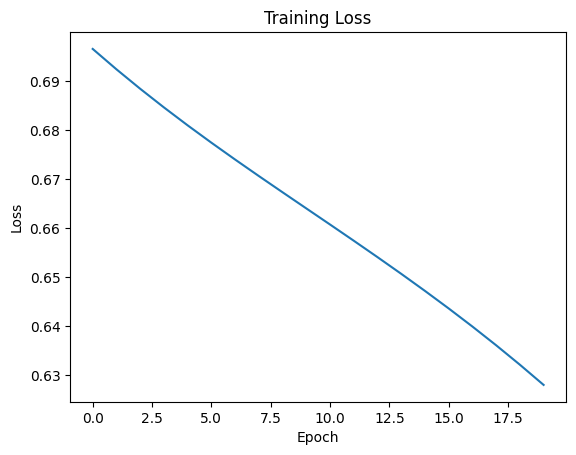

In [19]:
plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.show()